## Linear Models
Linear models assume a linear relation between the feature and target.

* Linear regression models (Regression)
* Logisti regression models (Classification)

### 1.1 Simple linear regression

* Model the relationship between single variable and continous respons variable.
Can be expressed as follows :




### 
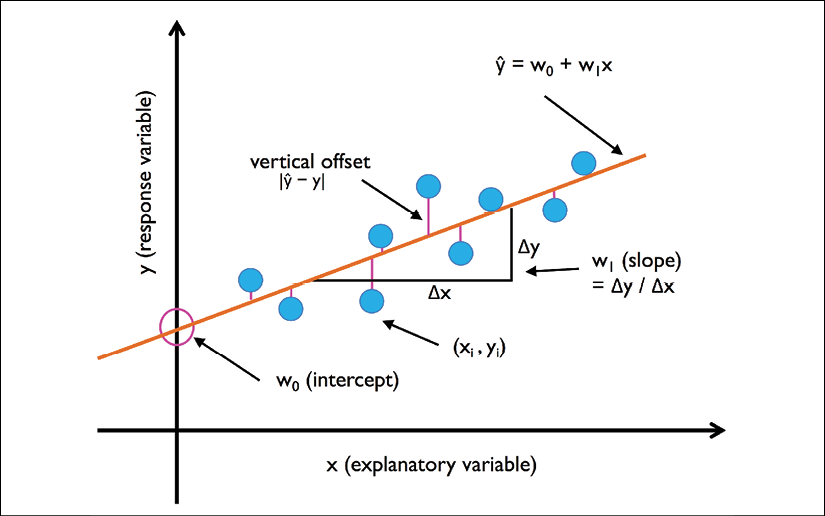

### 1.2 Multiple linear regresssion
Models the relationship between multiple variables and one continous target variable.

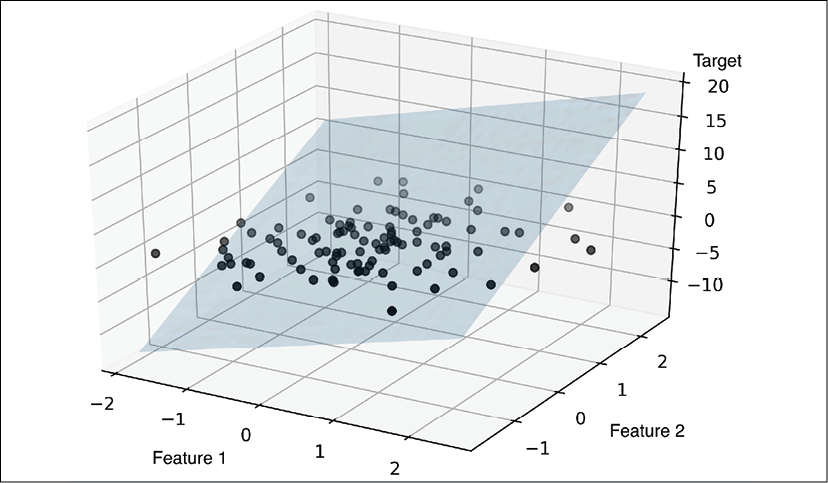

### 2. How do you fit a line ?

Imagine we have to fit a linear line to these points. 

|x|y|
|:----:|:----:|
|0.9|1.5|
|1.9|2.5|
|2.5|1|
|3.5|3.5|
|5|3.5|
|4|8|
|6|4.5|


We can do it in multiple ways. Which one is the best ?

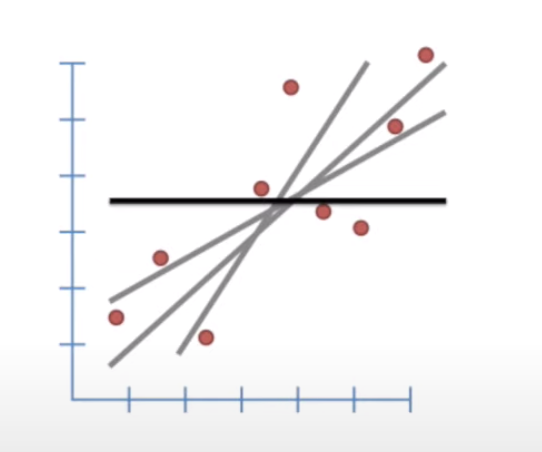

We calculate the Sum of sqaured errors(residuals) . As follows :

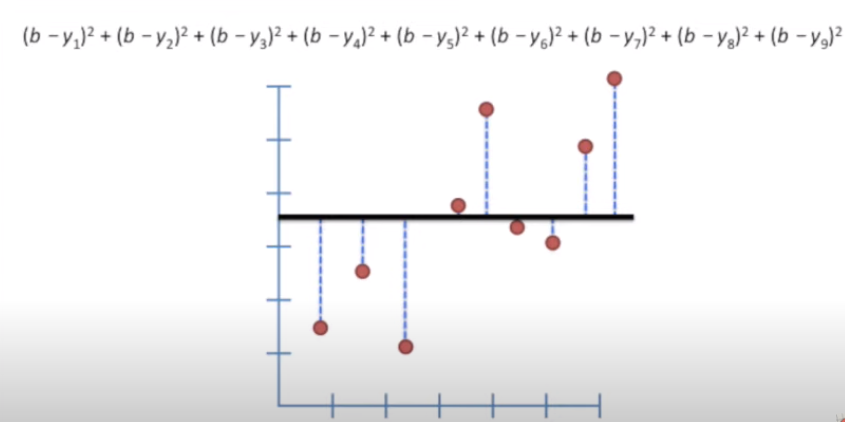
which is 24.62 

If we rorate the line a little bit , the sum of square residuals = 18.72
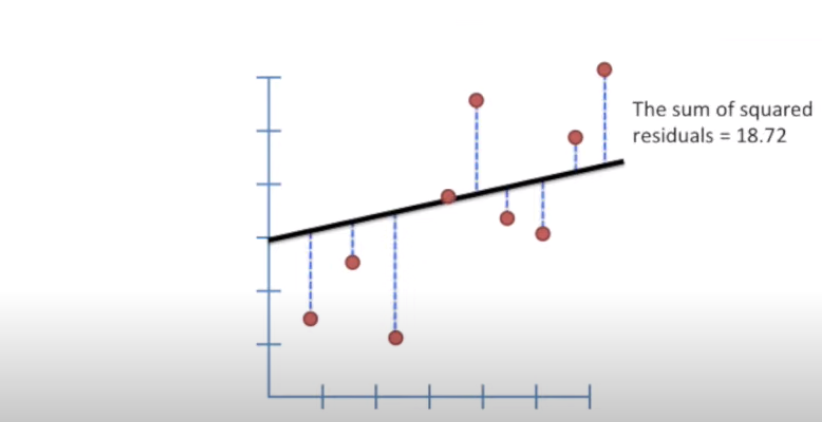

What if we keep on rotating this continously ?
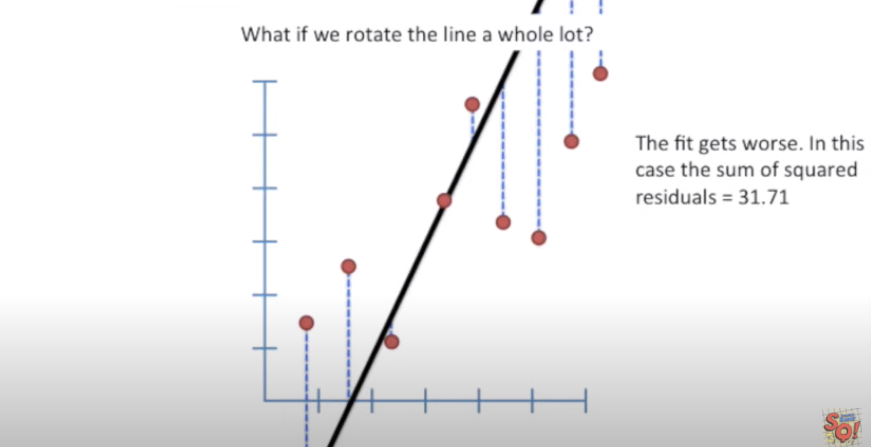

If we  plot the sum of squared residuals for each line we sholud get a plot like this :

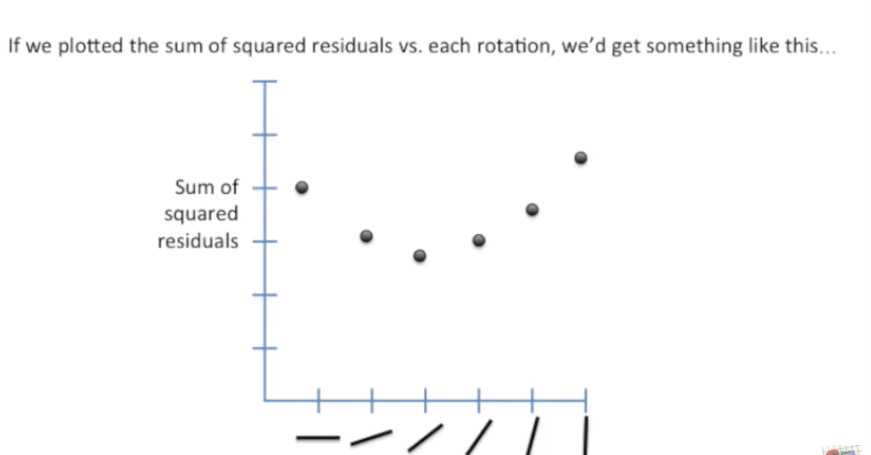

If we plot the SSE,slope and intercept,taking the derivatives of both the slope and intercepts tells us where the optimal values are for the best fit.

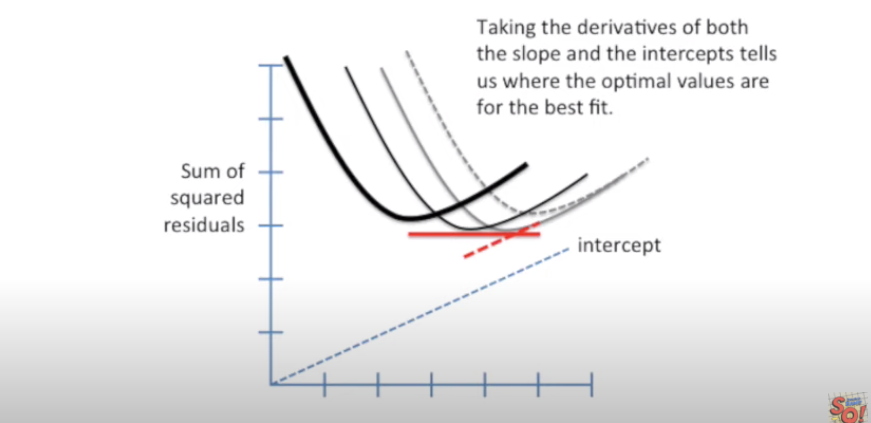

### TL;DR

1. We want to minimize the square of the distance between the observed value and the actual linear function we are trying to approximate. 

>In machine learning we assume that underlying every data that there is function generating that data, however we are unable to learn that data, hence we try to approximate the form of the function from the availabl data."

2. We do this by taking taking the derivate and finding where it it equal to 0.

3. Final line minimises the sums of squared between it and the real line.

### 3.Linear regression :
Let us try to predict the value of the house,using the Boston Housing dataset.
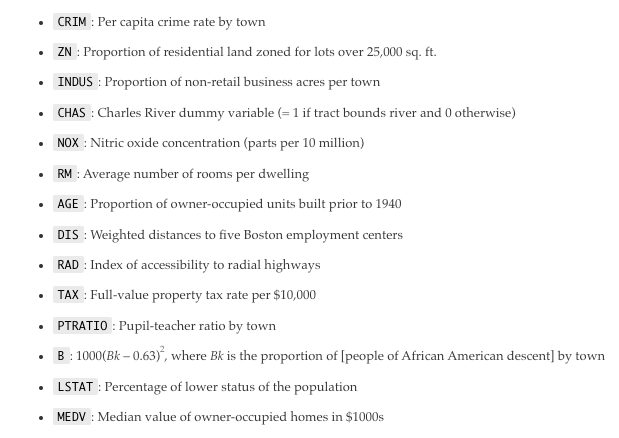

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


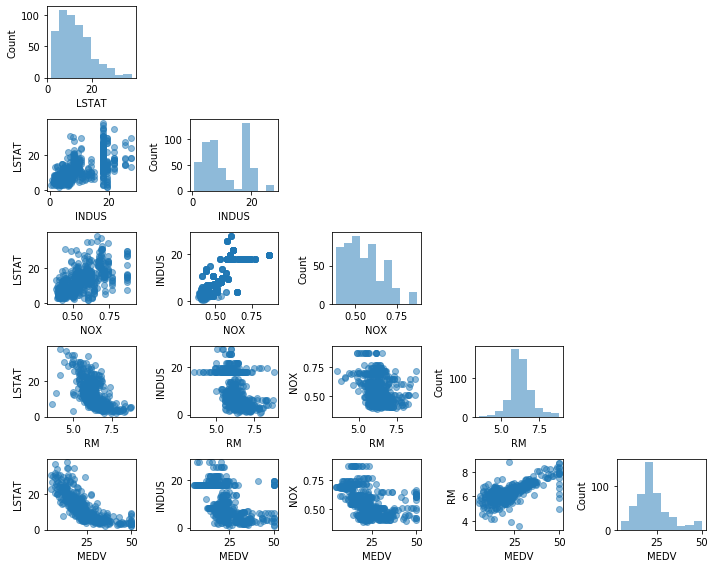

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

Let us find variables that are highly co-related with the target abd try to fit a linear regrssion model.

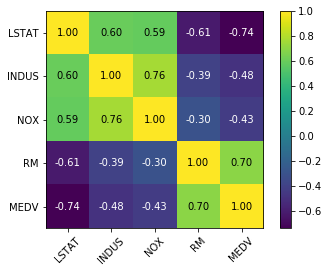

In [3]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,row_names=cols,column_names=cols)
plt.show()

In [4]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

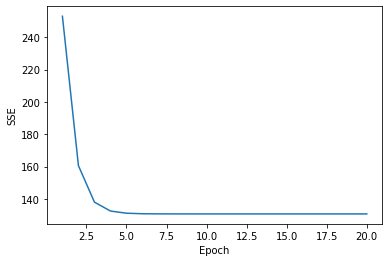

In [5]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()

lr = LinearRegressionGD()
lr.fit(X_std,y_std)

plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [29]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X,model.predict(X), color='black', lw=2)
    return None

In [30]:
sk_lr = LinearRegression()
sk_lr.fit(X_std,y_std)
y_pred = sk_lr.predict(X_std)

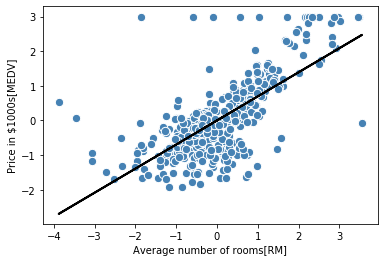

In [31]:
lin_regplot(X_std,y_std,sk_lr)
plt.xlabel('Average number of rooms[RM]')
plt.ylabel('Price in $1000s[MEDV]')
plt.show()

### 4. Evaluating the performance.

In [9]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train,X_test,y_train,y_test= train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=73)
X_train.shape

(354, 13)

In [10]:
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#### 4.1. Residual Analysis


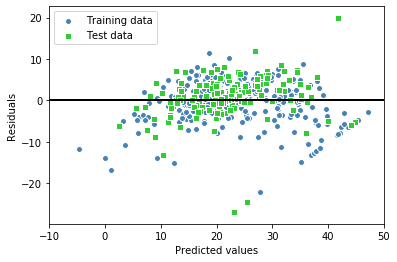

In [11]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

#### 4.2: Mean Squared Error

In [12]:
from sklearn.metrics import mean_squared_error
print(f'Train MSE :{mean_squared_error(y_train,y_train_pred)}')
print(f'Test MSE :{mean_squared_error(y_test,y_test_pred)}')

Train MSE :20.44788310557848
Test MSE :27.223206758841062


#### 4.3 : Co-efficient of determination R^2

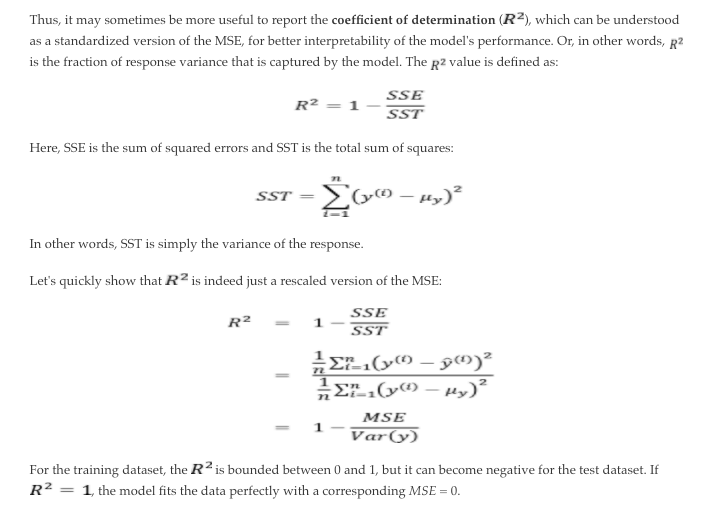

In [13]:
from sklearn.metrics import r2_score
print(f'Train R2 score :{r2_score(y_train,y_train_pred)}')
print(f'Test R2 score :{r2_score(y_test,y_test_pred)}')

Train R2 score :0.7719957308051262
Test R2 score :0.6088298227163644


### 5. Logistic Regression (Classification) 

Linear classifier can also be used to classify data between two or more classes, if the classes are linearly seperable.

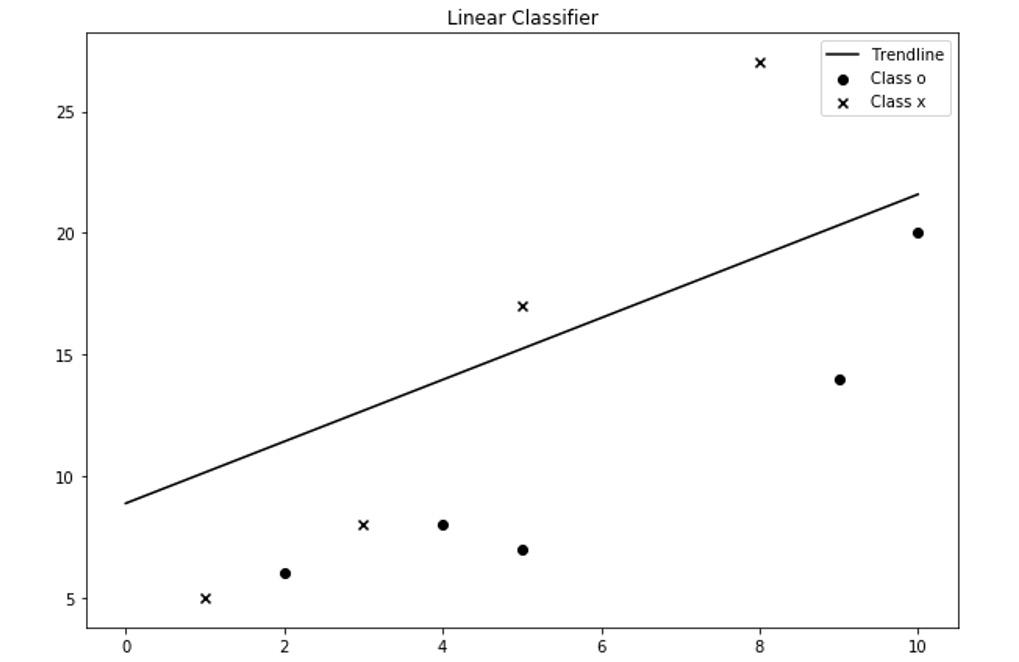

Logistic function :

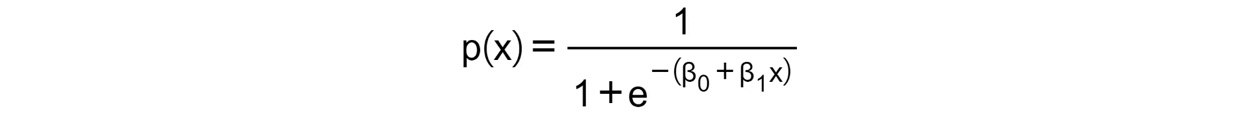

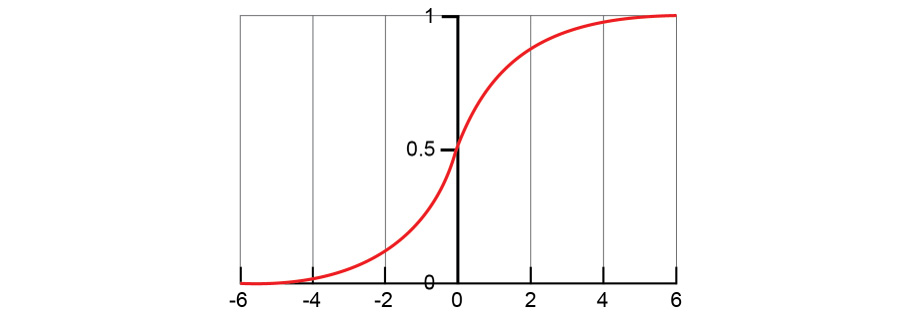

### 6. Logistic regression for binary classification 

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
print(iris.DESCR)
print("-----")
iris

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

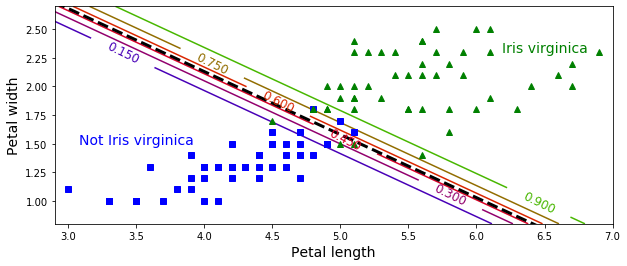

In [15]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

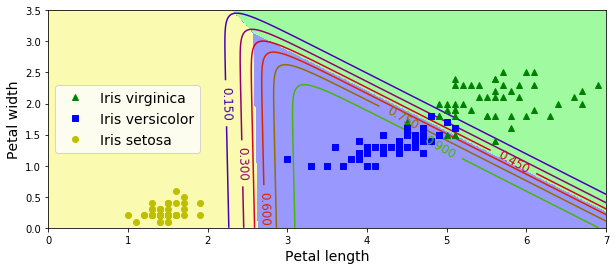

In [16]:
X = iris["data"][:,(2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",
                                 C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

### 6.Tips for linear models:

> Always delete co-related variables.

> Standardised the input.

In [17]:
np.sum(y_proba[1])

1.0

In [18]:
y_predict[1]

0